In [1]:
# Import Libraries for requirement

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Get data from CSV into DataFrame

ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
# Checking the list of available columns after merging the required tables of the data

ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [4]:
# Grouping the type/nature of crime in separate list

violent_crimes_against_persons = [
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'CAUSING DEATH BY NEGLIGENCE'
]

crimes_against_property = [
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'ROBBERY', 'BURGLARY', 'THEFT',
    'AUTO THEFT', 'OTHER THEFT', 'ARSON'
]

abduction_and_trafficking_crimes = [
    'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'KIDNAPPING AND ABDUCTION OF OTHERS', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'
]

other_crimes = [
    'RIOTS', 'CRIMINAL BREACH OF TRUST',
    'CHEATING', 'COUNTERFIETING',
    'INSULT TO MODESTY OF WOMEN', 'OTHER IPC CRIMES'
]

# Adding crime category to ipc DF

crime_cat = [violent_crimes_against_persons, crimes_against_property, abduction_and_trafficking_crimes,other_crimes ]
ipc['Violent Crimes Against Persons'] = ipc[violent_crimes_against_persons].sum(axis=1)
ipc['Crimes Against Property'] = ipc[crimes_against_property].sum(axis=1)
ipc['Abduction and Trafficking Crimes'] = ipc[abduction_and_trafficking_crimes].sum(axis=1)
ipc['Other Crimes'] = ipc[other_crimes].sum(axis=1)

In [6]:
ipc.sample(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes
809,CHHATTISGARH,RAIGARH,2002,56,24,0,39,0,39,5,...,15,30,0,90,378,1547,602,709,10,492
360,MAHARASHTRA,NAGPUR RURAL,2001,101,56,6,81,0,81,23,...,294,141,0,254,1574,5680,1904,2796,46,2112
5593,DELHI UT,WEST,2008,46,30,8,54,0,54,145,...,6,172,0,19,1931,5286,716,4467,290,2104
5761,GUJARAT,RAJKOT RURAL,2009,41,28,4,28,0,28,57,...,3,279,0,328,2548,4269,997,944,114,2668
3426,WEST BENGAL,MURSHIDABAD,2005,115,23,46,236,0,236,121,...,1,696,0,232,910,4052,2419,1139,242,1145


In [7]:
# Create a dataset with relevant features only

feat = ['STATE/UT', 'DISTRICT', 'YEAR', 'Violent Crimes Against Persons', 'Crimes Against Property','Abduction and Trafficking Crimes', 'Other Crimes', 'TOTAL IPC CRIMES']

ipc_new = ipc[feat]

ipc_new.head()

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,1930,676,92,1751,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,2415,1016,106,1030,4125
2,ANDHRA PRADESH,CHITTOOR,2001,3018,1739,118,1752,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,1402,472,50,1434,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,2239,2549,98,2714,6507


In [9]:
# Scale the data

ipc_to_scaled = ipc_new.iloc[:,3:] 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(ipc_to_scaled)

#### 4.1 Creating 3 clusters

In [10]:
# Creating Clusters using K Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

ipc['zone'] = kmeans.fit_predict(scaled_features)
ipc_new['zone'] = kmeans.fit_predict(scaled_features)

ipc_new['zone'].value_counts()

C:\Users\Devesh Verma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Devesh Verma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Devesh Verma\AppData\Local\Temp\ipykernel_18964\2409464473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipc_new['zone'] = kmeans.fit_predict(scaled_features)


zone
0    7279
2    1318
1      12
Name: count, dtype: int64

# Observation:

Classification of Areas for the Given Year:

Category 0: Designates Peaceful Areas

Category 2: Indicates Moderate Areas

Category 1: Identifies Sensitive Areas


This classification system provides a nuanced assessment of the security landscape for the specified year.

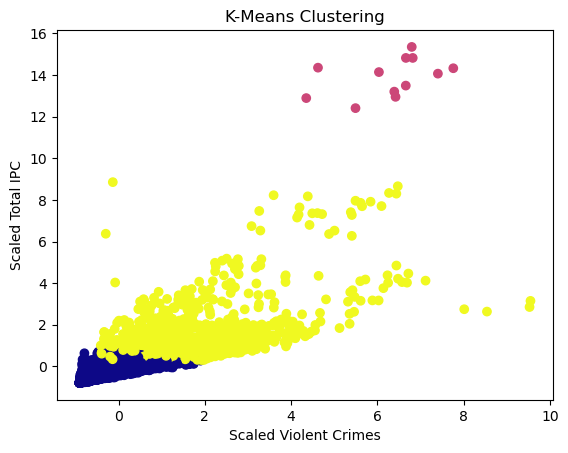

In [11]:
# Plot the clusters

plt.scatter(scaled_features[:, 0], scaled_features[:, -1], c=ipc_new['zone'], cmap='plasma')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Violent Crimes')
plt.ylabel('Scaled Total IPC')
plt.show()

#### 4.2 Create DataFrame for each cluster that shows data according to the areas.

In [12]:
# Get unique cluster labels

unique_clusters = ipc_new['zone'].unique()

# Extract DataFrame for Cluster 0
peaceful = ipc_new[ipc_new['zone'] == 0]

# Extract DataFrame for Cluster 1
sensitive = ipc_new[ipc_new['zone'] == 1]

# Extract DataFrame for Cluster 2
moderate = ipc_new[ipc_new['zone'] == 2]

In [15]:
peaceful.sample(5)

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
8003,GUJARAT,KUTCH (WEST-BHUJ),2012,379,419,36,1166,1806,0
6210,UTTAR PRADESH,BULANDSHAHAR,2009,918,749,204,1178,2595,0
4830,WEST BENGAL,COOCHBEHAR,2007,964,347,136,971,2051,0
6038,NAGALAND,LONGLENG,2009,3,6,0,13,19,0
474,PUNJAB,TARN TARAN,2001,345,170,30,182,634,0


In [14]:
moderate.sample(5)

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
829,GUJARAT,MEHSANA,2002,1627,1658,82,2418,5120,2
2198,GUJARAT,AHMEDABAD COMMR.,2004,2839,12671,430,7579,17553,2
1977,UTTAR PRADESH,LUCKNOW,2003,1070,4061,236,3348,6806,2
3842,MAHARASHTRA,PUNE RURAL,2006,2006,2408,80,2077,5573,2
7957,BIHAR,VAISHALI,2012,2894,1913,446,1001,5186,2


In [16]:
sensitive.sample(5)

,STATE/UT,DISTRICT,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
8591,DELHI UT,DELHI UT TOTAL,2012,7960,46507,7940,18588,54287,1
2742,DELHI UT,DELHI UT TOTAL,2004,6376,40527,2418,25056,53623,1
7057,DELHI UT,DELHI UT TOTAL,2010,6948,48392,6416,16339,51292,1
4146,DELHI UT,DELHI UT TOTAL,2006,7075,37734,2884,29833,57963,1
3441,DELHI UT,DELHI UT TOTAL,2005,6950,38744,3181,27393,56065,1


#### Analyse your clusters and prepare a report that explains all your observations.

In [17]:
# Check Statistical Summary for peaceful area

peaceful.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.0
mean,2006.522737,557.966891,617.738975,60.806842,906.288089,1844.484545,0.0
std,3.449474,464.749930,620.483628,66.400242,787.345585,1363.881867,0.0
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2004.000000,182.000000,202.000000,16.000000,266.000000,697.500000,0.0
50%,2007.000000,458.000000,448.000000,40.000000,707.000000,1591.000000,0.0
75%,2010.000000,832.000000,832.000000,84.000000,1351.500000,2865.500000,0.0
max,2012.000000,2576.000000,6358.000000,782.000000,4543.000000,5840.000000,0.0


In [18]:
moderate.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.00000,1318.000000,1318.0
mean,2007.257208,2283.205615,3091.955994,206.367982,3856.80956,7977.732170,2.0
std,3.479827,1221.754619,3624.953488,199.645819,2556.02988,4391.226596,0.0
min,2001.000000,451.000000,423.000000,0.000000,624.00000,3885.000000,2.0
25%,2004.000000,1503.500000,1209.250000,76.000000,2287.00000,5480.750000,2.0
50%,2008.000000,1976.500000,1866.000000,134.500000,3201.00000,6643.500000,2.0
75%,2010.000000,2836.500000,3473.500000,269.500000,4574.75000,8552.250000,2.0
max,2012.000000,9604.000000,29958.000000,1174.000000,33481.00000,34638.000000,2.0


In [19]:
sensitive.describe()

,YEAR,Violent Crimes Against Persons,Crimes Against Property,Abduction and Trafficking Crimes,Other Crimes,TOTAL IPC CRIMES,zone
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,2006.500000,6604.416667,41274.500000,4180.583333,22626.083333,52764.500000,1.0
std,3.605551,938.398874,4917.311488,2031.683604,4590.124606,3259.581805,0.0
min,2001.000000,4828.000000,33622.000000,2312.000000,16339.000000,47404.000000,1.0
25%,2003.750000,6251.250000,37545.500000,2824.500000,18327.500000,50025.750000,1.0
50%,2006.500000,6839.000000,40463.500000,3217.500000,23257.000000,53488.000000,1.0
75%,2009.250000,7080.250000,46013.500000,5408.000000,25640.250000,54804.250000,1.0
max,2012.000000,7960.000000,48392.000000,7940.000000,29833.000000,57963.000000,1.0


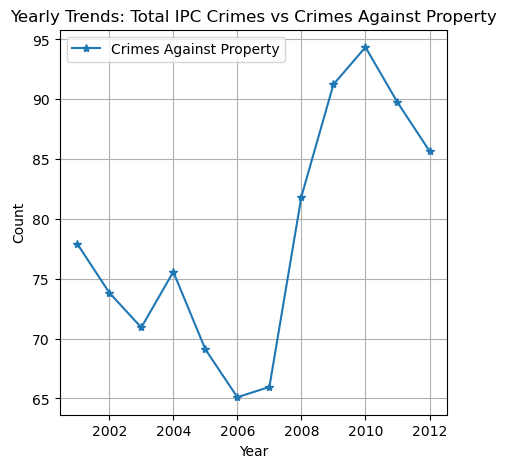

In [20]:
# Assuming your DataFrame is named 'df'
# Filter data for the years 2002 to 2012
selected_columns = ['YEAR', 'TOTAL IPC CRIMES', 'Crimes Against Property']
selected_data = sensitive[selected_columns]

# Group by 'YEAR' and sum the counts
yearly_totals = selected_data.groupby('YEAR').sum()

# Plot the line plot
plt.figure(figsize=(5, 5))

plt.plot(yearly_totals.index, yearly_totals['Crimes Against Property']*100/(yearly_totals['TOTAL IPC CRIMES']), marker='*', label='Crimes Against Property')

plt.title('Yearly Trends: Total IPC Crimes vs Crimes Against Property')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

### 1. What is impacting more crimes in sensitive areas. 

Unveiling Trends in Sensitive Areas: A Focus on Delhi UT

In the pinpointed sensitive areas, notably Delhi UT, a persistently high contribution ranging from 65% to 90% of property-related crimes substantially influences the overall crime rates.

As indicated by the statistical summary, the total IPC crime in this context exhibits fluctuations within the range of 47,404 and 57,963. This dynamic scenario emphasizes the need for targeted measures to address and mitigate property-related crimes in order to curb the overall crime rates effectively.

#### 2. What needs to be done to reduce crime. 

Mitigating Crime: Targeted Interventions in Sensitive Areas

To effectively curb crime, targeted interventions are paramount, especially in identified sensitive areas such as Delhi UT. Prioritizing the persistent high contribution of property-related crimes, ranging from 65% to 90%, should be at the forefront of crime prevention efforts. A strategic focus on implementing comprehensive measures to reduce the overall total IPC crime, fluctuating between 47,404 and 57,963, is imperative for enhancing community safety. By addressing these specific challenges, a more secure and resilient environment can be fostered, contributing to the well-being of the community at large.

#### 3. Most safe and unsafe districts.

**UNSAFE DISTRICT:**

Distinct Concern: Delhi UT's Prolonged Presence in the Sensitive Zone (2001-2012)


In [22]:
# SAFE DISTRICTS

selected_columns = ['DISTRICT', 'TOTAL IPC CRIMES']
selected_data =peaceful[selected_columns]

# Group by 'YEAR' and sum the counts
yearly_totals = selected_data.groupby(['DISTRICT']).sum()

yearly_totals.sort_values(by='TOTAL IPC CRIMES', ascending=True).head(5)

,TOTAL IPC CRIMES
DISTRICT,
RAILWAYS KATRA,2
RAILWAYS KMR,10
BIEO,16
CID,23
CAR,24


#### SAFE DISTRICT(s):

#### Districts with Minimal IPC Crimes (2001-2012):

| District                 | Total IPC Crimes Reported |
|--------------------------|---------------------------|
| RAILWAYS KATRA           | 2                         |
| RAILWAYS KMR             | 10                        |
| BIEO                     | 16                        |
| CID                      | 23                        |
| CAR                      | 24                        |


Can be considered safe